In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.impute import SimpleImputer

___
# K-Means Model Training and Testing
___

In [43]:
#Read the cleaned numeric dataset csv into a dataframe 
clean_path = ("/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/cleaned_numeric_dataset.csv")
clean_data = pd.read_csv(clean_path)

#clean_data only contains numeric features


In [44]:
clean_data.head()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,0,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,1,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,2,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,3,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,4,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


In [45]:
#Remove Unnamed:0 
clean_data.drop(clean_data.filter(regex="Unnamed").columns, axis=1, inplace=True)

In [46]:
#Reintroduce the categorical identifiers list from the transform.ipynb notebook
categorical_ids = ['artist_name', 'track_name', 'genre', 'topic', 'lyrics']

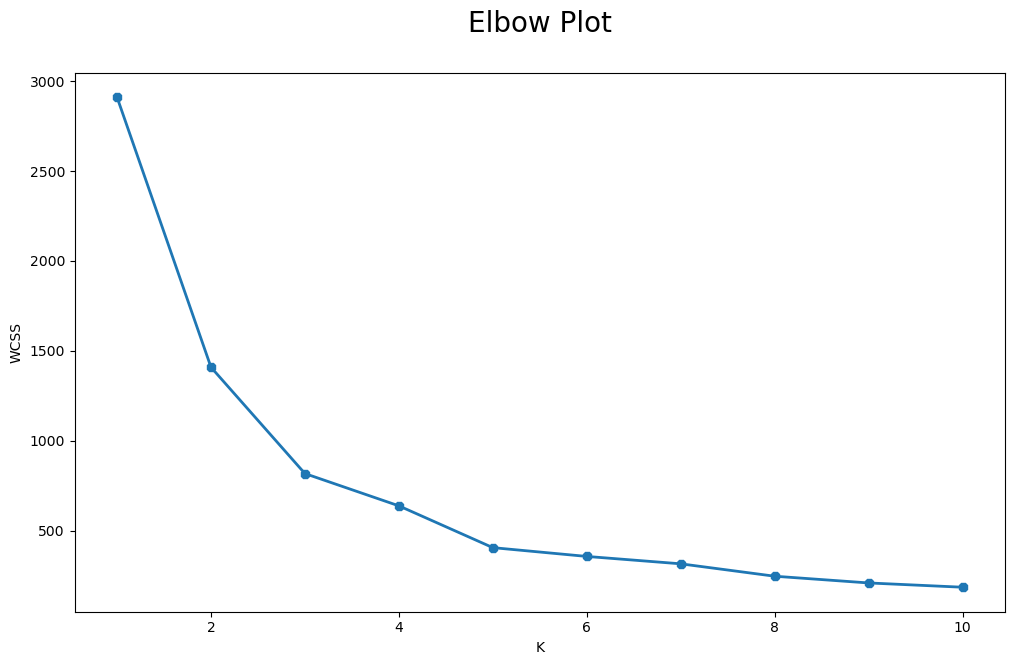

In [47]:
#Create an Elbow Plot of the WCSS (within-cluster-sum-of-squares)

X1 =clean_data.loc[:, ['obscene', 'age']].values

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

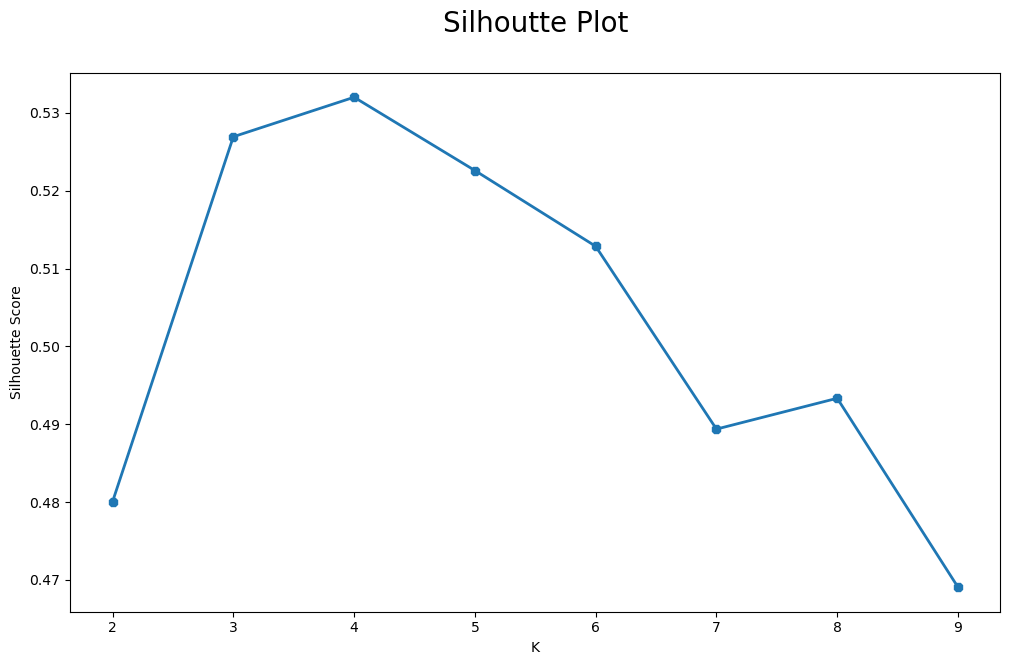

In [48]:
#Create a line plot to visualize the silhouette score
silhouette = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 10), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [49]:
# Create new Kmeans object to get optimal number of clusters

kmeans = KMeans(n_clusters=2)

#Fit the object to the clean_data df

kmeans.fit(X1)



KMeans(n_clusters=2)

In [50]:
# Generate labels for the  dataset

labels = kmeans.fit_predict(X1)
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [51]:
# output the centroids of your clusters

kmeans.cluster_centers_

array([[0.0547119 , 0.65514081],
       [0.13829751, 0.20252766]])

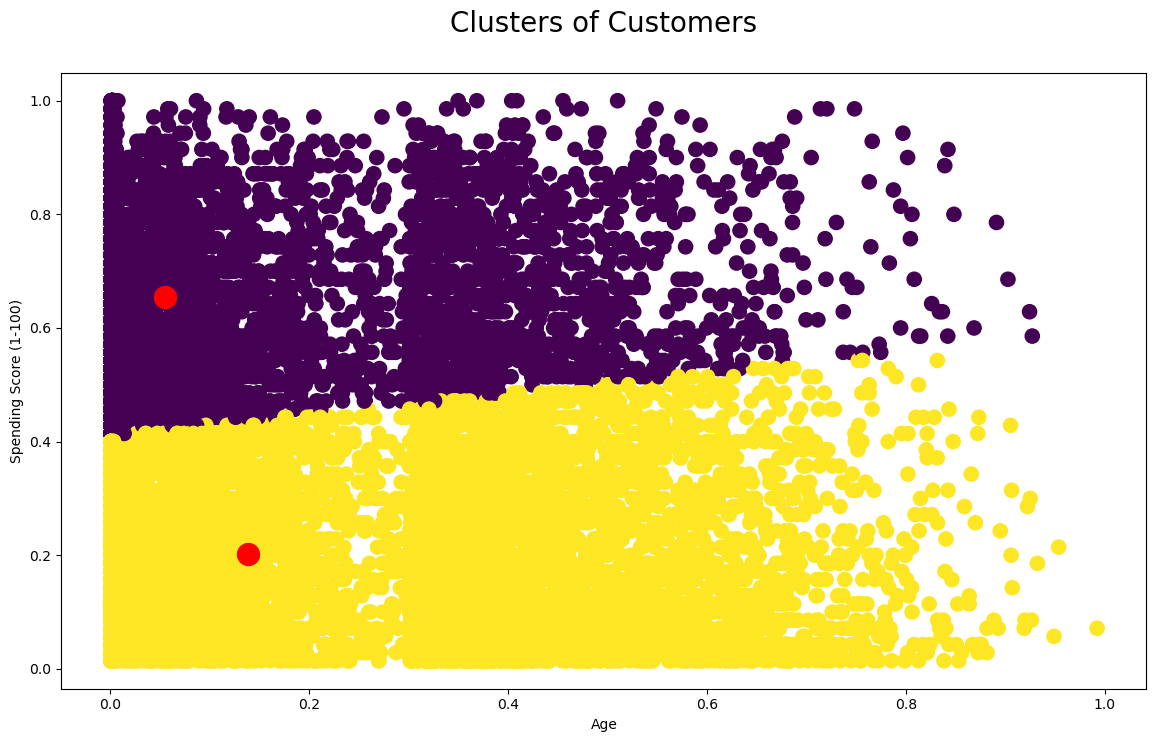

In [52]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1 [:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Customers\n', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()